## Arima Exercise

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

**Task:** Print the top 5 rows.

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [4]:
def plot_timeseries(data):
    return data.plot()

**Task:** Plot the time series from above.

<AxesSubplot:xlabel='Month'>

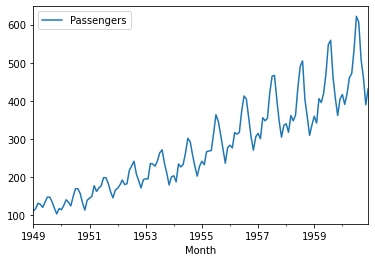

In [5]:
plot_timeseries(df)

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [6]:
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
rolling_std = rolling.std()

**Task:** Plot the two time series:
- with rolling mean 
- with rolling std

<AxesSubplot:xlabel='Month'>

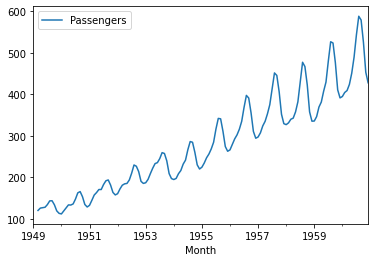

In [7]:
plot_timeseries(rolling_mean)

<AxesSubplot:xlabel='Month'>

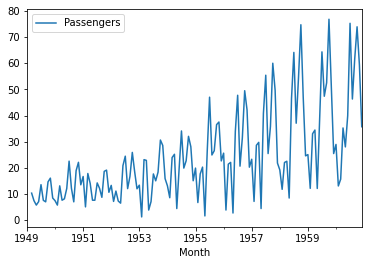

In [8]:
plot_timeseries(rolling_std)

**Task:** Test the stationarity of all the time series

**Task:** Perform a log transformation on the original time series. 

In [9]:
df_log = np.log(df)

**Task:** Plot the transformed time series.

<AxesSubplot:xlabel='Month'>

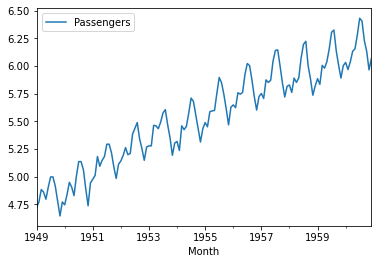

In [10]:
plot_timeseries(df_log)

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

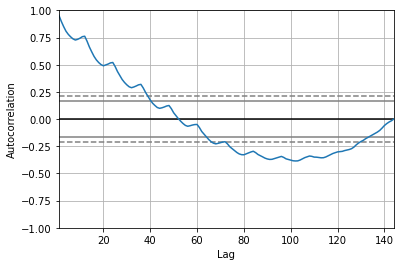

In [11]:
autocorrelation_plot(df_log)

In [12]:
model = ARIMA(df_log, order=(5,1,0))

C:\Users\pavel\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pavel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [13]:
model_fit = model.fit()

In [14]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 131.373
Method:                       css-mle   S.D. of innovations              0.096
Date:                Tue, 01 Feb 2022   AIC                           -248.746
Time:                        23:48:09   BIC                           -228.006
Sample:                    02-01-1949   HQIC                          -240.318
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0101      0.006      1.682      0.093      -0.002       0.022
ar.L1.D.Passengers     0.1951      0.084      2.329      0.020       0.031       0.359
ar.L2.D.Passengers  

<AxesSubplot:xlabel='Month'>

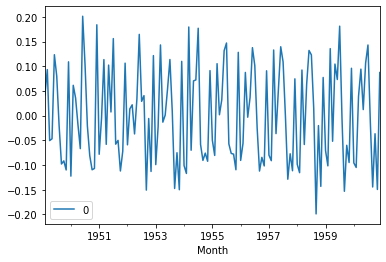

In [15]:
residuals = DataFrame(model_fit.resid)
plot_timeseries(residuals)

**Task:** Plot the predictions (not transformed to the original scale).

In [16]:
# split into train and test sets
X = df_log.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [17]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

C:\Users\pavel\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=5.641687, expected=5.723585
predicted=5.838579, expected=5.752573
predicted=5.796686, expected=5.707110
predicted=5.745384, expected=5.874931
predicted=5.883987, expected=5.852202
predicted=5.813919, expected=5.872118
predicted=5.911094, expected=6.045005
predicted=6.021254, expected=6.142037
predicted=6.141878, expected=6.146329
predicted=6.138157, expected=6.001415
predicted=5.936919, expected=5.849325
predicted=5.842866, expected=5.720312
predicted=5.746494, expected=5.817111
predicted=5.933864, expected=5.828946
predicted=5.875467, expected=5.762051
predicted=5.804130, expected=5.891644
predicted=5.910769, expected=5.852202
predicted=5.824095, expected=5.894403
predicted=5.948147, expected=6.075346
predicted=6.063002, expected=6.196444
predicted=6.206386, expected=6.224558
predicted=6.207813, expected=6.001415
predicted=5.908857, expected=5.883322
predicted=5.890334, expected=5.736572
predicted=5.740669, expected=5.820083
predicted=5.962454, expected=5.886104
predicted=5.

Test RMSE: 0.104


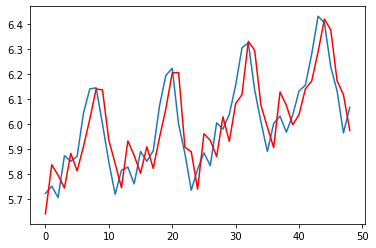

In [18]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

**Task:** Plot the predictions (transformed to the original scale).

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 